# Proyecto UD3
#### UD3. Aprendizaxe Non Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Entrega en el moodle el fichero notebook solución así como un pdf generado con el contenido del notebook y su ejecución.

### Dataset: Países

Nuestro gallego de oro, Amancio Ortega, ha cumplido 87 años y le da vueltas a cuál será su legado en este mundo.
Es por ello, que ha contactado con el IES de Teis para que le ayudemos a identicar aquellos países más necesitados teniendo en cuenta factores socio-económicos y de salud para determinar el estado de cada país.
Una vez categorizados, la Fundación Ortega podrá abrir hospitales, escuelas y comedores sociales en dichos países.

Disponemos de un dataset con la información mundial de 166 países.

Lista de atributos para cada país:

* país: nombre del país
* mort_inf: número de niños menores de 5 años muertos por cada 1000 nacimientos
* exportaciones: exportaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* salud: gasto total en salud per cápita. Expresado como % del PIB per cápita
* importaciones: importaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* ingresos: ingresos netos por persona
* inflacion: la medida de la tasa de crecimiento anual del PIB total
* esp_vida: La cantidad promedio de años que viviría un niño recién nacido si los patrones de mortalidad actuales se mantuvieran iguales
* num_hijos: el número de hijos que nacerían de cada mujer si las tasas actuales de fecundidad por edad se mantuvieran iguales.
* pib: el PIB per cápita. Calculado como el PIB total dividido por la población total.

A Amancio no le interesan mucho los números ni las gráficas, sino que le extraigas conclusiones de cada uno de los pasos qué realizas y porqué los realizas.

## Importación de librerías

In [63]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## 1. Importación del dataset

In [64]:
# Lemos el archivo csv que contiene los datos con los que trabajaremos
paises = pd.read_csv('paises.csv')

## 2. EDA&Preprocessing (2 puntos)

### EDA

In [65]:
# Visualización preliminar de los datos. Mostramos las primeras 15 filas del dataframe.
paises.head(15)

,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [66]:
# Visualizamos los parámetros estadísticos de cada columna del dataframe: Número de datos, media, desviación estándar,
# valor mínimo, percentiles y  valor máximo.
paises.describe()

,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [67]:
# Comprobamos la información del dataframe cargado.
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais           167 non-null    object 
 1   mort_inf       167 non-null    float64
 2   exportaciones  167 non-null    float64
 3   salud          167 non-null    float64
 4   importaciones  167 non-null    float64
 5   ingresos       167 non-null    int64  
 6   inflacion      167 non-null    float64
 7   esp_vida       167 non-null    float64
 8   num_hijos      167 non-null    float64
 9   pib            167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


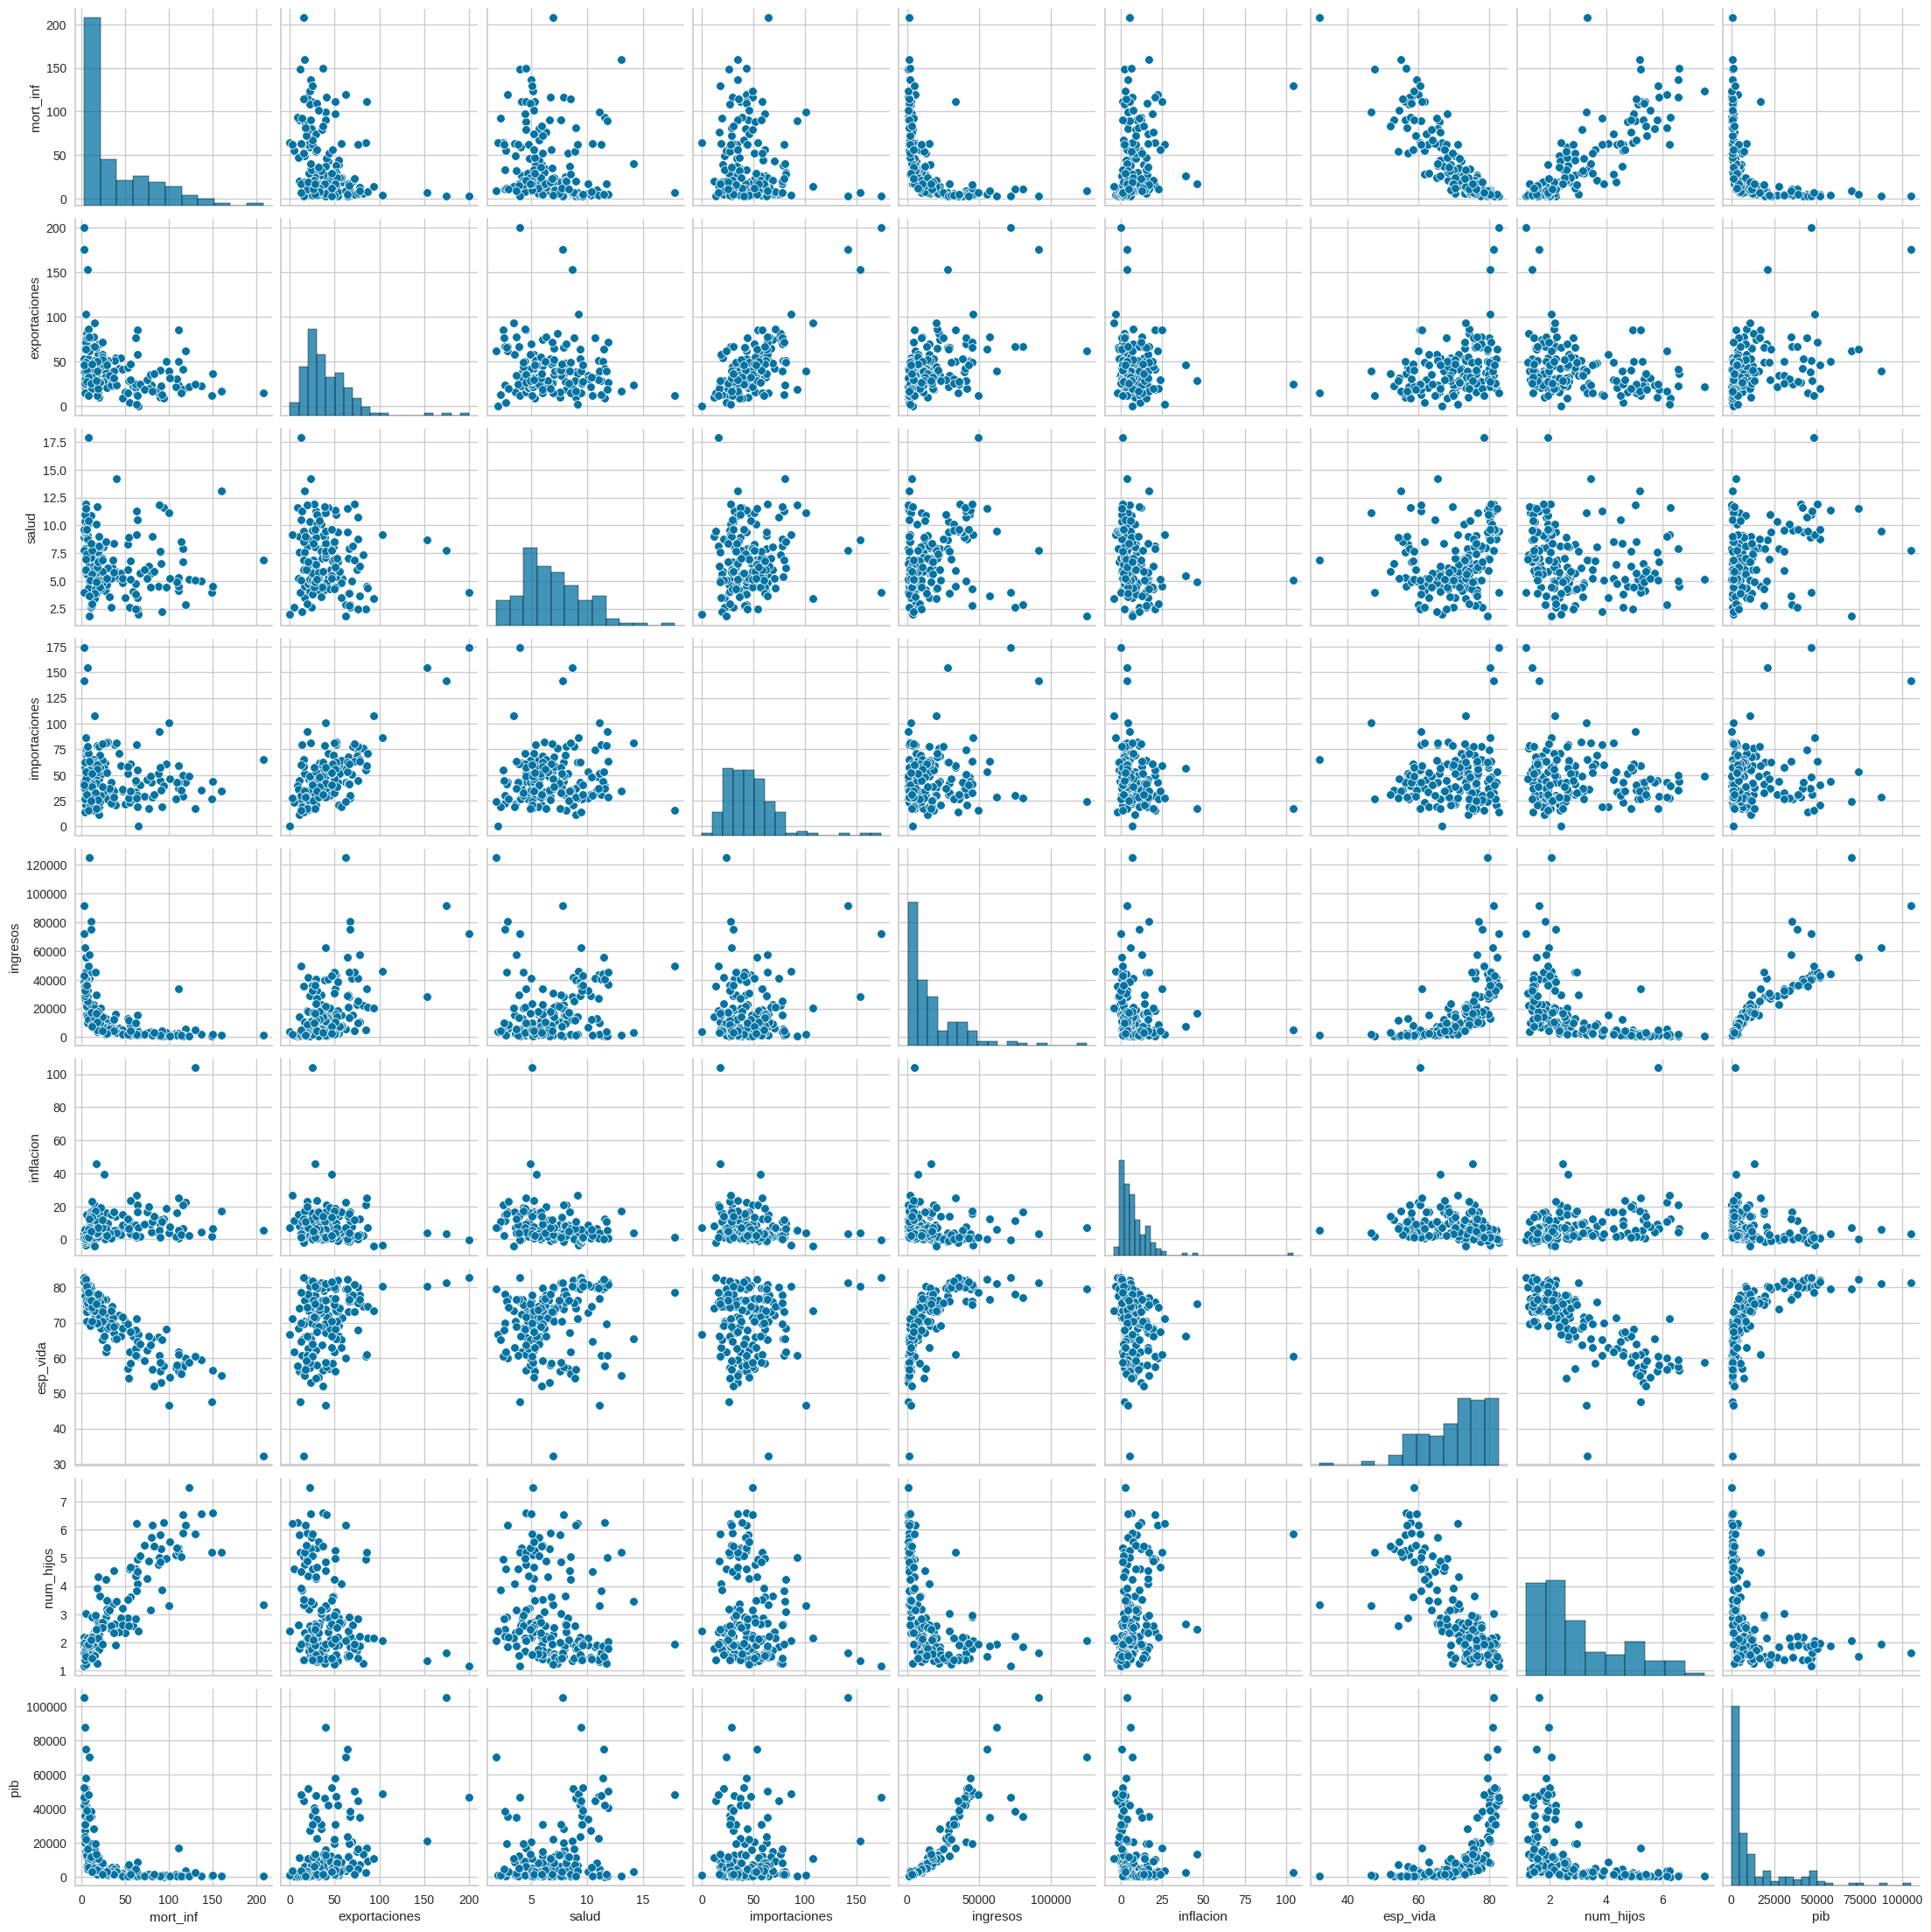

In [68]:
# Relaciones entre las columnas numéricas.
sb.pairplot(paises)

In [69]:
# Matriz de correlación entre todas las variables numéricas de nuestro conjunto de datos. Medida que indica el grado de relación entre dos columnas,
# con valores que varían entre -1 y 1. Añadimos el parámetro 'numeric_only' con valor True, ya que ahora aún hay columnas con valores categóricos y habría conflictos.
paises.corr(numeric_only = True)

,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
mort_inf,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exportaciones,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
salud,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
importaciones,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
ingresos,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflacion,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
esp_vida,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
num_hijos,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
pib,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

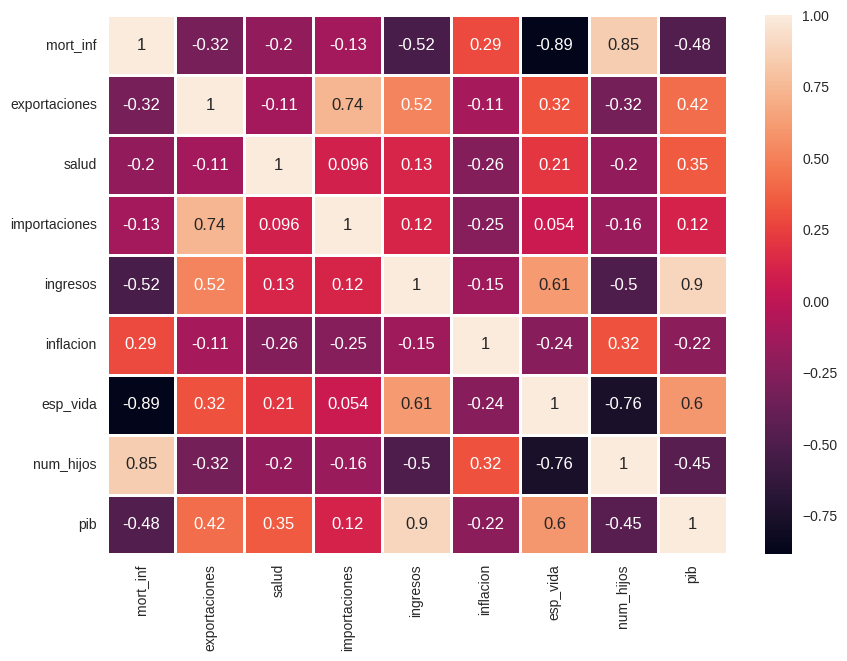

In [70]:
# Pasamos la información anterior a un gráfico para poder así visualizarlo mejor y que sea más intuitivo a la hora de extraer conclusiones acerca de la importancia de cada columna.
# Podemos ver que existen columnas que tienen un alto valor de correlación (mort_inf - esp_vida (-0,89), mort_inf - num_hijos (0.85), ingresos - pib (0.9))
plt.figure(figsize=(10,7))
sb.heatmap(paises.corr(numeric_only = True), annot=True, linewidths=2)

### Preporcessing data

In [71]:
# Comprobamos si existen valores nulos o que faltan.
paises.isnull().sum()

pais             0
mort_inf         0
exportaciones    0
salud            0
importaciones    0
ingresos         0
inflacion        0
esp_vida         0
num_hijos        0
pib              0
dtype: int64

In [72]:
# Borramos las columnas innecesarias, en este caso borramos la columna 'pais' ya que sus valores no aportan valor a la hora de realizar
# posteriormente la agrupación (al ser todos sus valores distintos).
paises = paises.drop("pais", axis=1)
paises

,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [73]:
# Tratamiento de las variables categóricas. En este caso al borrar la única columna que tenía valores no numéricos no hace falta
# realizar ningún tipo de conversión de datos categóricos.

## 3. Creación de los modelos, entrenamiento, predicciones y representación gráfica (4 puntos)

In [74]:
# El primer paso es escalar los datos para después poder usarlos correctamente y que por causa de no hacer esto den valores resultantes extraños
sc = StandardScaler()
paises_escalado = sc.fit_transform(paises)

In [75]:
# MÉTODO ELBOW

# Creamos una lista en la que vamos a guardar los datos de la inertia que tiene cada modelo creado con valores de K distinto
distorsiones = []

# Establecemos un rango de valores para K
K = range(2,15)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(paises_escalado)
    distorsiones.append(kmeanModel.inertia_)

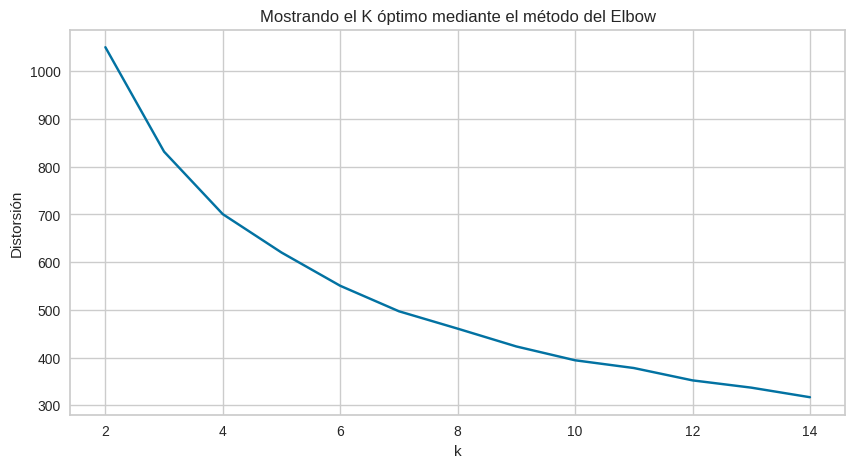

In [76]:
# Representamos los distintos valores de inertia que hay guardados en la lista anterior, acompañado de los valores de K asociado a cada uno de ellos
plt.figure(figsize=(10,5))
plt.plot(K, distorsiones, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

In [77]:
# MÉTODO SILHOUETTE SCORE

# Creamos una lista vacía en la que vamos a almacenar los distintos scores resultantes de aplicar el método Silhoutte Score, con distintos número de clústers
scores = list()

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(paises_escalado)
    scores.append(silhouette_score(paises_escalado, kmeans.labels_, metric='euclidean'))
    del(kmeans)

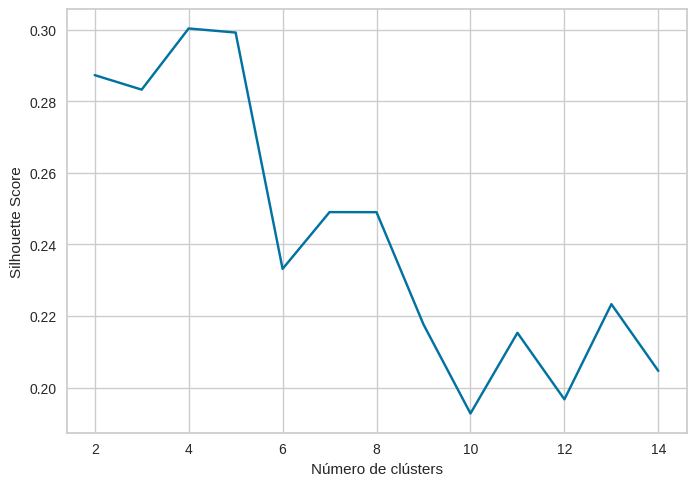

In [78]:
# Representamos los distintos valores del score asociado al número de clústers usado a la hora de aplicar dicho método
plt.plot(list(range(2, 15)), scores)
plt.xlabel('Número de clústers')
plt.ylabel('Silhouette Score')
plt.show()

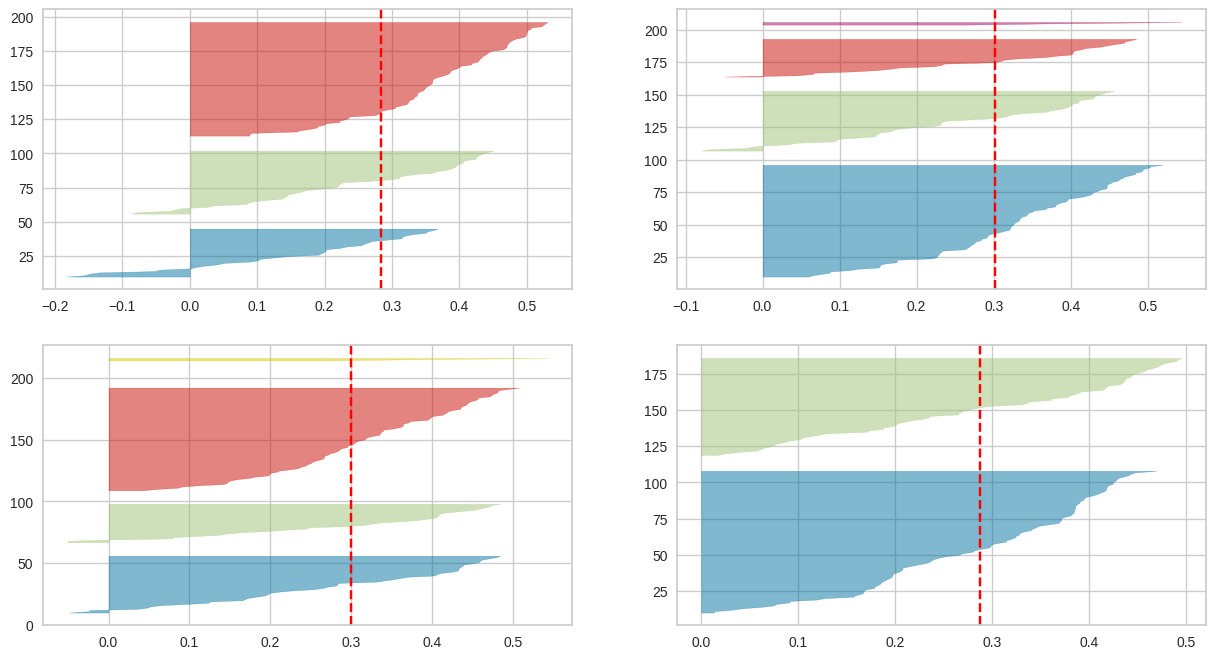

In [79]:
# Ajustamos dimensiones de los gráficos que vamos a representar
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Creamos una instancia del modelo K-Means en función del valor de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-1, 2)

    # Creamos una instancia de "SilhouetteVisualizer" con la instancia KMeans anterior
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(paises_escalado)

    # Como podemos observar en la represetación de abajo, el último valor que pongamos en la lista de valores de i no lo coge para realizar la representación de los
    # clústers. Puede que los valores no lleguen a formar otro nuevo clúster por lo que no pueda realizar la gráfica correctamente.

Los dos métodos son útiles para conocer el número de clústers de forma correcta, aún así, prefiero usar el método Silhouette ya que se me hace más fácil ver el número óptimo de clústers (valor más alto de la gráfica). En el método Elbow, es más difícil verlo, ya que es más subjetivo ver la posición correcta en la que la gráfica forma el "codo". Sin embargo, podemos ver que en los dos casos se puede ver de forma más o menos clara que el número óptimo es el 4.

In [80]:
k = 4
kmeans = KMeans(n_clusters=k)

In [81]:
# Realizamos las predicciones
y_pred = kmeans.fit_predict(paises_escalado)

In [82]:
# Extraemos los valores de cada centroide (uno por cada clúster)
centroides = kmeans.cluster_centers_
print(centroides)

[[-0.82860929  0.17262066  0.85918977 -0.29637276  1.46227512 -0.47818851
   1.10764922 -0.76368146  1.66190214]
 [ 1.38209405 -0.44902617 -0.17115749 -0.1972886  -0.69747801  0.40850458
  -1.27706228  1.39559546 -0.60950969]
 [-0.41103452  0.0076087  -0.20315863  0.04911688 -0.21707832 -0.03332883
   0.24812404 -0.43375408 -0.33115921]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]]


## 4. PCA (2 puntos)

In [83]:
# Creamos el modelo para que mantenga el 95% de la varianza de los datos originales al reducir la dimensionalidad
PCA = PCA(n_components=0.95)

In [84]:
# Obtenemos el dataset reducido
paises_reducido = PCA.fit_transform(paises_escalado)

### Prueba de nuevo del método KMeans con el dataset resultante después de ejecutar el PCA

In [85]:
# MÉTODO ELBOW

distorsiones_PCA = []

K = range(2,15)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(paises_reducido)
    distorsiones_PCA.append(kmeanModel.inertia_)

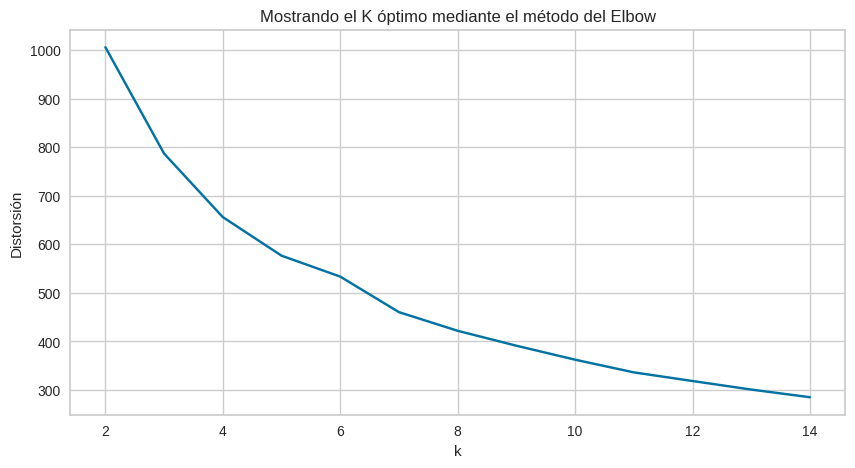

In [86]:
plt.figure(figsize=(10,5))
plt.plot(K, distorsiones_PCA, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

In [87]:
# MÉTODO SILHOUETTE SCORE

scores_PCA = list()

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(paises_reducido)
    scores_PCA.append(silhouette_score(paises_reducido, kmeans.labels_, metric='euclidean'))
    del(kmeans)

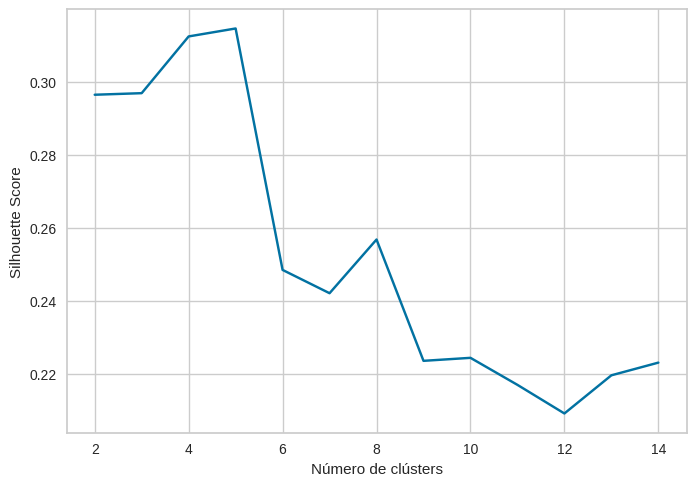

In [88]:
plt.plot(list(range(2, 15)), scores_PCA)
plt.xlabel('Número de clústers')
plt.ylabel('Silhouette Score')
plt.show()

In [89]:
# Podemos observar que en este caso después de aplicar la reducción de dimesionalidad, el silhouette nos da de valor óptimo para K el 5, un valor distinto
# al que nos daba anteriormente. Puede ser normal, ya que la reducción puede provocar que los datos sean más dispersos y que haya menos valores que
# se puedan agrupar, lo que provoca que haya más grupos. Aún así, podemos considerarlo correcto, ya que la diferencia del valor óptimo es pequeña.

In [90]:
k = 5
kmeans_PCA = KMeans(n_clusters=k)

In [91]:
y_pred_PCA = kmeans_PCA.fit_predict(paises_reducido)

In [92]:
# Para mirar si el rendimiento del modelo ha sido mejor después de aplicar al dataset una reducción de dimensionalidad miraremos los scores resultantes
# de aplicar el método Silhouette. Estas listas fueron guardando los valores para cada valor de K anteriormente dentro de un rango.
# Como podemos observar, excepto en un algún caso los scores más altos están en la lista que contiene los datos usando el dataset reducido. Por lo que podemos concluír que
# si que existe una mejoría, en este caso casi mínima debido al pequeño tamaño del dataset del que partimos, pero existente.

print("\t SIN PCA CON PCA")
print("<---------------------------->")
for i in range (0, 13):
  print(f"K: {i + 2}\t {scores[i].round(4)}\t {scores_PCA[i].round(4)}")


	 SIN PCA CON PCA
<---------------------------->
K: 2	 0.2874	 0.2964
K: 3	 0.2833	 0.2968
K: 4	 0.3004	 0.3123
K: 5	 0.2993	 0.3145
K: 6	 0.2332	 0.2484
K: 7	 0.2491	 0.242
K: 8	 0.249	 0.2567
K: 9	 0.2176	 0.2235
K: 10	 0.1927	 0.2243
K: 11	 0.2153	 0.2169
K: 12	 0.1967	 0.2091
K: 13	 0.2233	 0.2195
K: 14	 0.2046	 0.223


## 5. Conclusiones (2 puntos)

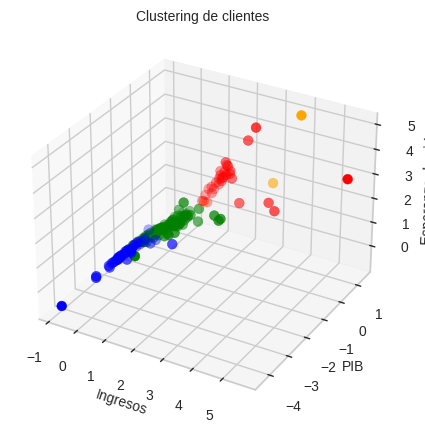

In [93]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(paises_escalado[y_pred == 0, 4], paises_escalado[y_pred == 0, 6], paises_escalado[y_pred == 0, 8], s=50, c='red', label='Clúster 1')
ax.scatter(paises_escalado[y_pred == 1, 4], paises_escalado[y_pred == 1, 6], paises_escalado[y_pred == 1, 8], s=50, c='blue', label='Clúster 2')
ax.scatter(paises_escalado[y_pred == 2, 4], paises_escalado[y_pred == 2, 6], paises_escalado[y_pred == 2, 8], s=50, c='green', label='Clúster 3')
ax.scatter(paises_escalado[y_pred == 3, 4], paises_escalado[y_pred == 3, 6], paises_escalado[y_pred == 3, 8], s=50, c='orange', label='Clúster 4')

ax.set_title('Clustering de clientes', fontsize=10)
ax.set_xlabel('Ingresos', fontsize=10)
ax.set_ylabel('PIB', fontsize=10)
ax.set_zlabel('Esperanza de vida', fontsize=10)

plt.show()

En la gráfica podemos ver que el clúster número 2 (pintado de azul) es en el que se agrupan aquellos países que cuentan con los valores más bajos en cuánto a las columnas usadas para la gráfica, que son: ingresos, pib y esperanza de vida.

Aunque no se representen, podemos intuir que esos países también son los que tienen los demás valores socioeconómicos más bajos, por lo que serían esos en los que se debería de invertir, ya que:

- Sus bajos ingresos provocan una necesidad urgente de desarrollo económico y apoyo social.
- El PIB bajo dificulta el acceso a servicios básicos como educación, salud e infraestructuras. La construcción de hospitales y escuelas harían mejorar dicho acceso a la población de esos países.
- La esperanza de vida también se vería mejorada gracias a la construcción de hospitales.